In [14]:
## Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
from sklearn.datasets import load_iris


In [29]:
df = pd.read_csv("mcdonalds.csv")


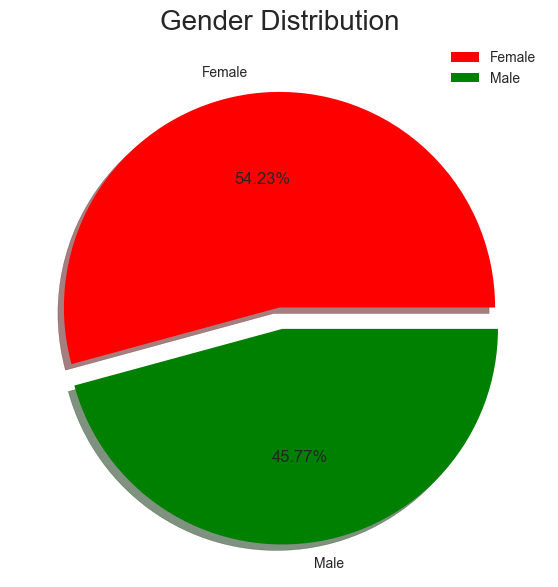

In [31]:
gender_labels = ['Female', 'Male']
gender_size = df['Gender'].value_counts()
gender_colors = ['red', 'green']
gender_explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(gender_size, colors=gender_colors, explode=gender_explode, labels=gender_labels, shadow=True, autopct='%.2f%%')
plt.title('Gender Distribution', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()


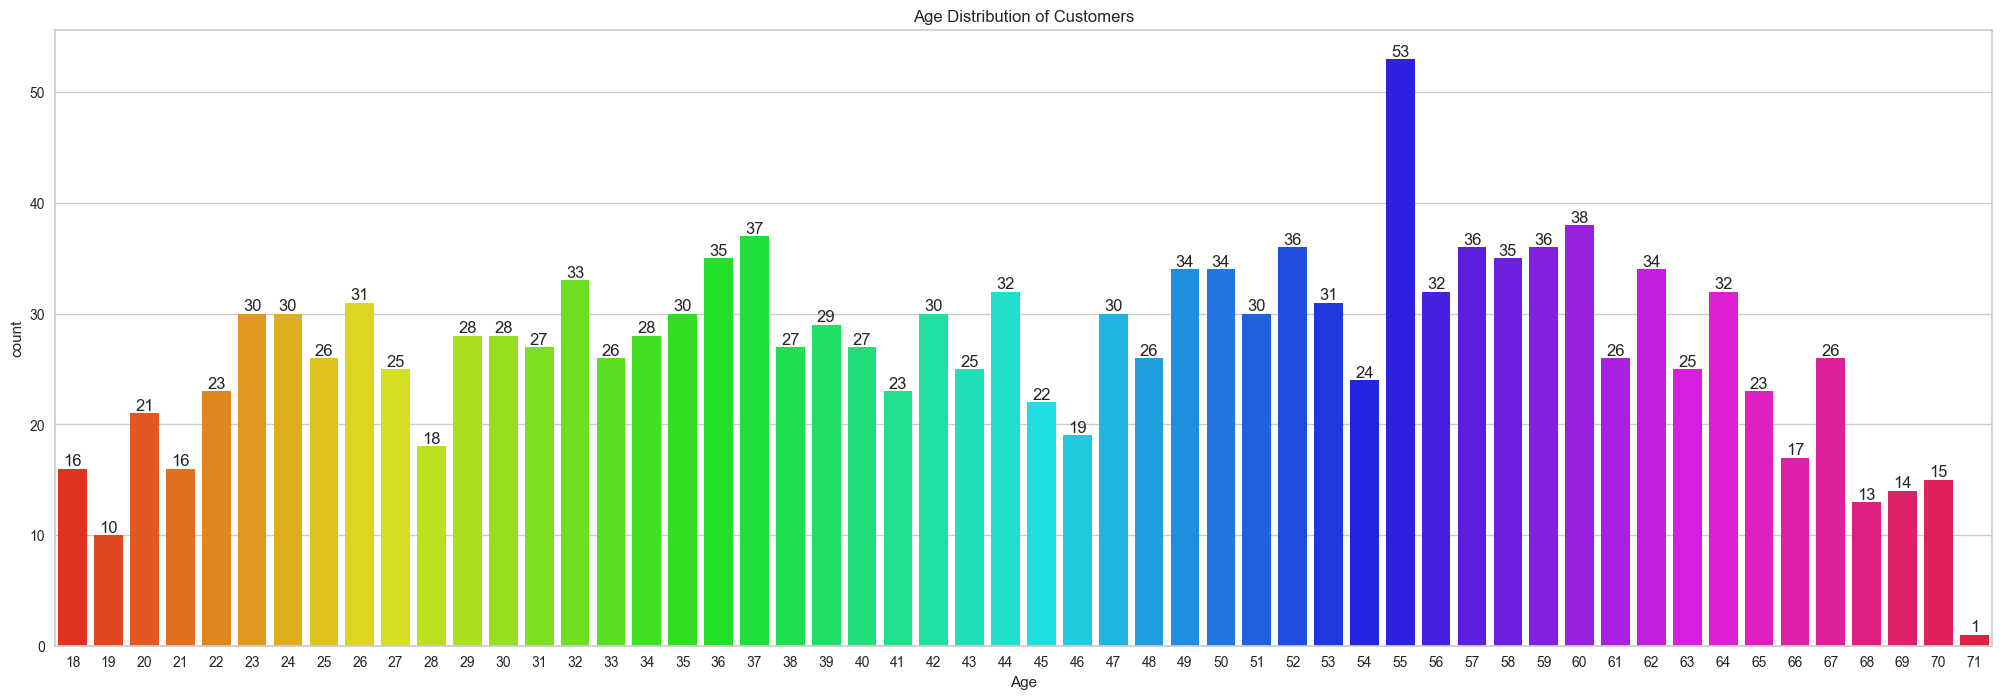

In [5]:
plt.rcParams['figure.figsize'] = (25, 8)
age_distribution = sns.countplot(x=df['Age'], palette='hsv')
age_distribution.bar_label(age_distribution.containers[0])
plt.title('Age Distribution of Customers')
plt.show()


In [6]:
binary_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
               'tasty', 'expensive', 'healthy', 'disgusting']

for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [7]:
x = df[binary_cols].values
pca_data = preprocessing.scale(x)
pca = PCA(n_components=11)
pc = pca.fit_transform(x)
pc_names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11']
pc_df = pd.DataFrame(data=pc, columns=pc_names)


In [10]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=pc_names, index=binary_cols)


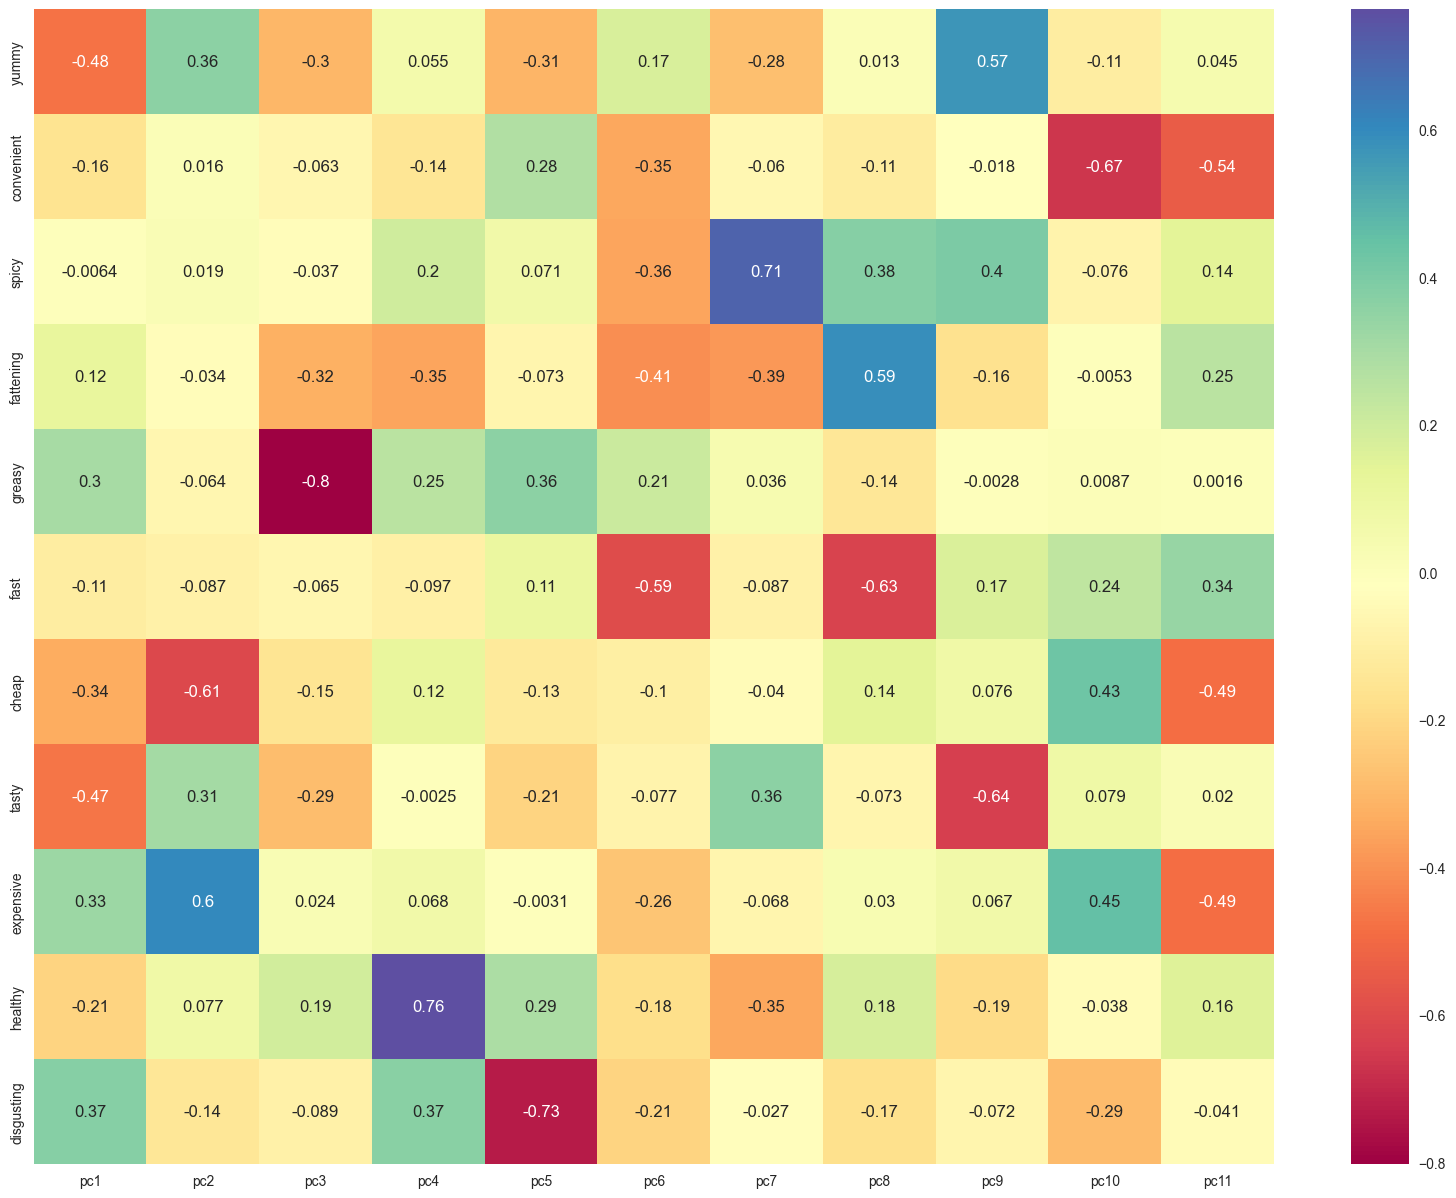

In [11]:
plt.rcParams['figure.figsize'] = (20, 15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


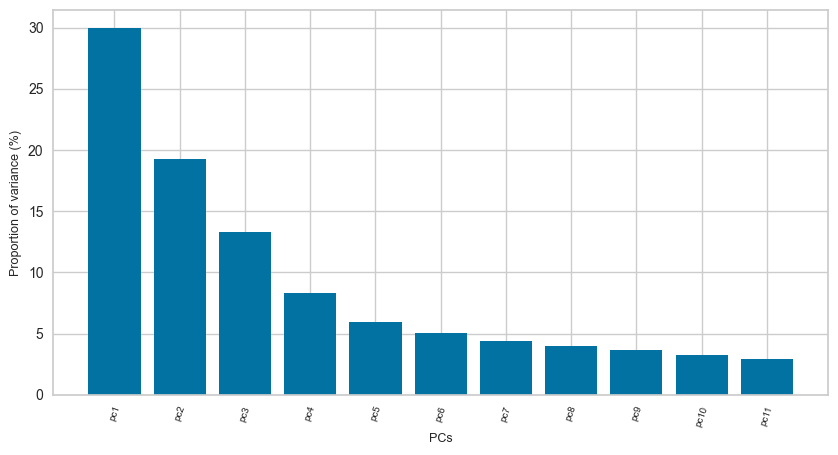

In [25]:
#Scree plot (Elbow test)- PCA
cluster.screeplot(obj=[pc_names, pca.explained_variance_ratio_],show=True,dim=(10,5))

c:\Users\vansh_10ne3x1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vansh_10ne3x1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vansh_10ne3x1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vansh_10ne3x1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

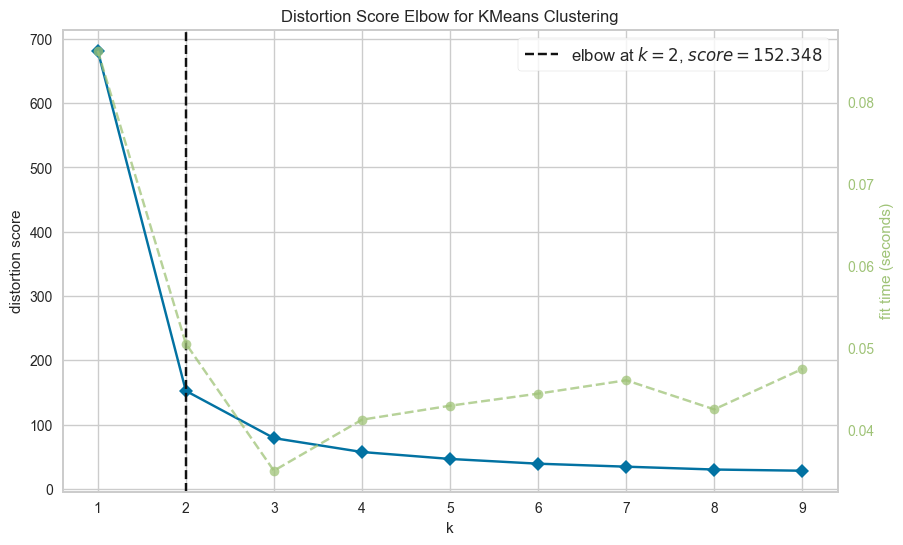

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Load the Iris dataset
df = load_iris()
X = df.data

# Instantiate the KMeans model and the visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

# Set the figure size
plt.figure(figsize=(10, 6))

# Fit the data and visualize the elbow curve
visualizer.fit(X)
visualizer.show()